Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
MUTAG(18)
Epoch: 001, Loss: 0.7892, Train Acc: 0.6647 Test Acc: 0.6667
Epoch: 002, Loss: 0.5441, Train Acc: 0.6647 Test Acc: 0.6667
Epoch: 003, Loss: 0.4031, Train Acc: 0.6647 Test Acc: 0.6667
Epoch: 004, Loss: 0.4034, Train Acc: 0.6706 Test Acc: 0.6667
Epoch: 005, Loss: 0.3785, Train Acc: 0.6647 Test Acc: 0.6667
Epoch: 006, Loss: 0.3450, Train Acc: 0.6824 Test Acc: 0.6667
Epoch: 007, Loss: 0.3168, Train Acc: 0.7000 Test Acc: 0.6667
Epoch: 008, Loss: 0.3536, Train Acc: 0.7176 Test Acc: 0.6667
Epoch: 009, Loss: 0.3448, Train Acc: 0.7647 Test Acc: 0.6667
Epoch: 010, Loss: 0.3777, Train Acc: 0.7706 Test Acc: 0.7222
Epoch: 011, Loss: 0.3316, Train Acc: 0.7529 Test Acc: 0.7222
Epoch: 012, Loss: 0.2798, Train Acc: 0.7471 Test Acc: 0.7222
Epoch: 013, Loss: 0.3309, Train Acc: 0.7529 Test Acc: 0.6667
Epoch: 014, Loss: 0.3181, Train Acc: 0.8059 Tes

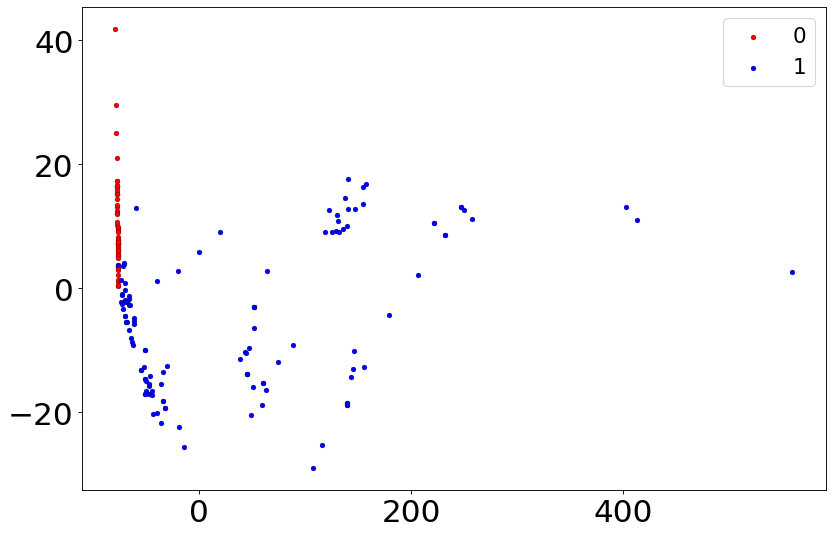

running tsne
tsne time 0.8089766502380371
silhouette average 0.46169403 std 0.41057065
davies bouldin score 0.6363142721446315
calinski harabasz score 222.78000475498496


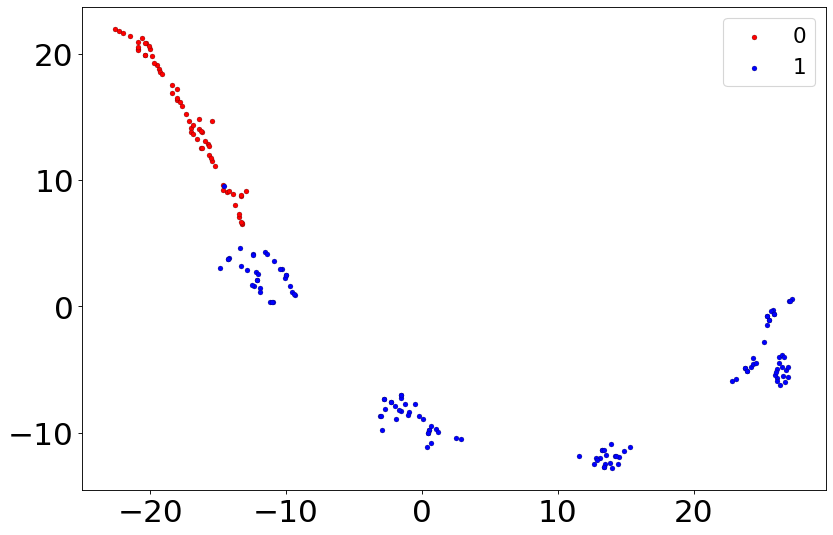

running umap
umap time 3.2173385620117188
silhouette average 0.41623464 std 0.3560927
davies bouldin score 0.9472426913739029
calinski harabasz score 88.27038325678019


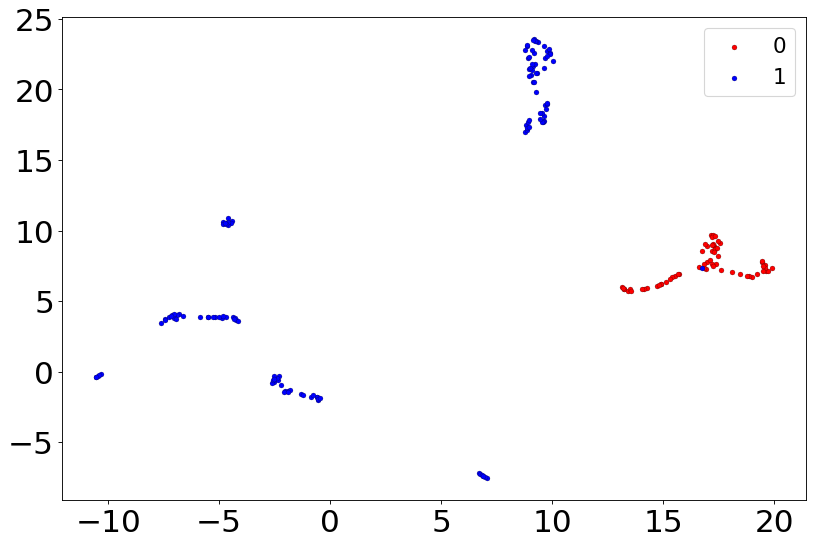

100%|██████████| 188/188 [00:00<00:00, 1876.85it/s]

running ivis
Building KNN index
Extracting KNN neighbours


100%|██████████| 188/188 [00:00<00:00, 926.50it/s] 


Training neural network
Epoch 1/1000
2/2 [==============================] - 1s 14ms/step - loss: 1.6790
Epoch 2/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5230
Epoch 3/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.7533
Epoch 4/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.4806
Epoch 5/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.5402
Epoch 6/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.5449
Epoch 7/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.7563
Epoch 8/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.5871
Epoch 9/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4515
Epoch 10/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.6413
Epoch 11/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.4872
Epoch 12/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5072
Epoch 13/1000


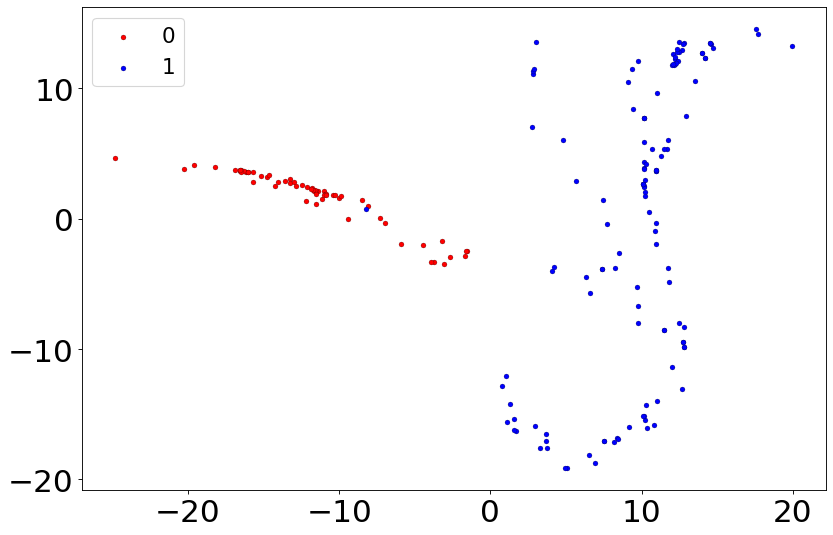

In [6]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install umap-learn
!pip install ivis[cpu]
import os.path as osp
import sys
import torch
import torch.nn.functional as F
from torch.nn import Sequential, Linear, BatchNorm1d, ReLU
from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader
from torch_geometric.nn import GINConv, global_add_pool

sys.path.append('/content/drive/MyDrive/Thesis/gin_mutag')
from visualize_embeddings import *

path = "/content/drive/MyDrive/Thesis/gin_mutag/"
dataset = TUDataset(path, name='MUTAG').shuffle()

train_dataset = dataset[len(dataset) // 10:]
test_dataset = dataset[:len(dataset) // 10]
print(test_dataset)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=18)

print(test_loader)

class Net(torch.nn.Module):
    def __init__(self, in_channels, dim, out_channels):
        super(Net, self).__init__()

        self.conv1 = GINConv(
            Sequential(Linear(in_channels, dim), BatchNorm1d(dim), ReLU(),
                       Linear(dim, dim), ReLU()))

        self.conv2 = GINConv(
            Sequential(Linear(dim, dim), BatchNorm1d(dim), ReLU(),
                       Linear(dim, dim), ReLU()))

        self.conv3 = GINConv(
            Sequential(Linear(dim, dim), BatchNorm1d(dim), ReLU(),
                       Linear(dim, dim), ReLU()))

        self.conv4 = GINConv(
            Sequential(Linear(dim, dim), BatchNorm1d(dim), ReLU(),
                       Linear(dim, dim), ReLU()))

        self.conv5 = GINConv(
            Sequential(Linear(dim, dim), BatchNorm1d(dim), ReLU(),
                       Linear(dim, dim), ReLU()))

        self.lin1 = Linear(dim, dim)
        self.lin2 = Linear(dim, out_channels)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = self.conv2(x, edge_index)
        x = self.conv3(x, edge_index)
        x = self.conv4(x, edge_index)
        x = self.conv5(x, edge_index)
        x = global_add_pool(x, batch)
        x = self.lin1(x).relu()
        x = F.dropout(x, p=0.5, training=self.training)
        hidden = x
        x = self.lin2(x)
        return hidden, F.log_softmax(x, dim=-1)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(dataset.num_features, 32, dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


def train():
    model.train()

    total_loss = 0
    batch = 0
    for data in train_loader:
        if batch == 0:
            data = data.to(device)
            optimizer.zero_grad()
            hidden,output = model(data.x, data.edge_index, data.batch)
            loss = F.nll_loss(output, data.y)
            loss.backward()
            optimizer.step()
            total_loss += float(loss) * data.num_graphs
            hidden_layer = hidden
            labels = data.y
        if batch >= 1:
            data = data.to(device)
            optimizer.zero_grad()
            hidden,output = model(data.x, data.edge_index, data.batch)
            loss = F.nll_loss(output, data.y)
            loss.backward()
            optimizer.step()
            total_loss += float(loss) * data.num_graphs
            hidden_layer = torch.cat((hidden_layer, hidden))
            labels = torch.cat((labels, data.y))
        batch+=1
    return hidden_layer, labels, total_loss / len(train_loader.dataset)


@torch.no_grad()
def test(loader):
    model.eval()

    total_correct = 0
    batch = 0
    for data in loader:
        if batch == 0:
            data = data.to(device)
            hidden,out = model(data.x, data.edge_index, data.batch)
            total_correct += int((out.argmax(-1) == data.y).sum())
            hidden_layer = hidden
            labels = data.y
        if batch >= 1:
            data = data.to(device)
            hidden,out = model(data.x, data.edge_index, data.batch)
            total_correct += int((out.argmax(-1) == data.y).sum())
            hidden_layer = torch.cat((hidden_layer, hidden))
            labels = torch.cat((labels, data.y))
        batch += 1
    return hidden_layer, labels, total_correct / len(loader.dataset)


for epoch in range(1, 500):
    hidden_train, labels_train, loss = train()
    hidden_train, labels_train, train_acc = test(train_loader)
    hidden_test, labels_test, test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f} '
          f'Test Acc: {test_acc:.4f}')
    if epoch == 499:
        hidden_train = hidden_train.cpu().detach().numpy()
        hidden_test = hidden_test.cpu().detach().numpy()
        labels_train = labels_train.cpu().detach().numpy()
        labels_test = labels_test.cpu().detach().numpy()
        hidden_all = np.concatenate((hidden_train, hidden_test))
        labels_all = np.concatenate((labels_train, labels_test))
        savemat('ginmutag.mat', {'ginmutag_embeddings_train': hidden_train,'ginmutag_node_labels_train': labels_train, 'ginmutag_embeddings_test': hidden_test,'ginmutag_node_labels_test': labels_test, 'ginmutag_embeddings_all': hidden_all,'ginmutag_node_labels_all': labels_all})
        print(labels_all)

        methods = ['pca','tsne','umap','ivis']
        print(hidden_all.shape)
        run_visualizations(methods,hidden_embeddings=hidden_all,
                           labels=labels_all,perplexity=20,neighbors=10,min_dist=0.2,supervised=False)


        